### Plotting Method 

####  Plotting Method HARDCODED for regularization exp.

In [2]:
"""Plotting Validation Accuracies for REGULARIZATION METHODS"""

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.5)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

def plot_for_model(acc_val, num_epochs, legend_names, exp_name, save = True,\
                  file_name = ["a.pdf"]):
    
    # Create Figures
    fig_acc= plt.figure()
    ax_acc = fig_acc.add_subplot(111)
    
    #Plot Data    
    no_models = acc_val.shape[0] # Number of models        
    epochs_vect = np.arange(1, num_epochs+1)#X-axis vector
    
    lw = 3 # line width
    ls = '-'
    for i in range(no_models):
        if "0.01" in legend_names[i]:             
            if "D=0" in legend_names[i]: c='violet'
            elif "D=1" in legend_names[i]: c='darkorchid'
            elif "D=2" in legend_names[i]: c='pink'
                
        elif "0.001" in legend_names[i]:             
            if "D=0" in legend_names[i]: c='darkcyan'
            elif "D=1" in legend_names[i]: c='midnightblue'
            elif "D=2" in legend_names[i]: c='dodgerblue'
                
        elif "0.0001" in legend_names[i]:             
            if "D=0" in legend_names[i]: c='mediumseagreen'
            elif "D=1" in legend_names[i]: c='lime'
            elif "D=2" in legend_names[i]: c='forestgreen'
                
        if i == len(legend_names)-1:
            c='gold'
            ax_acc.plot(epochs_vect, acc_val[i,:],lw=lw, c=c, ls=ls)

        else:
            ax_acc.plot(epochs_vect, acc_val[i,:], label = legend_names[i], lw=lw, c=c, ls=ls)

    # Configure Axis Properties
    lfont = 13
    ax_acc.legend(loc=0, prop={'size':lfont}, ncol = 3, fancybox=True, shadow=True)
    ax_acc.set_xlabel('Epoch number',fontsize=20 )
    ax_acc.set_ylabel('Accuracy', fontsize=20)
    ax_acc.set_title("Validation Accuracy - {}".format(exp_name),fontsize=27)#, fontweight='bold')
    ax_acc.tick_params(labelsize=15)
#     ax_acc.set_yscale("log")
        
        
    if(save): # Save figures
        fig_acc.tight_layout()
        fig_acc.savefig(file_name[0]) 

#### Normal Plotting Method 

In [2]:
"""Plotting Validation Accuracies for Different Experiments"""

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.style.use('ggplot')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

def plot_for_model(y_data, x_max, x_step, legend_names, exp_name, save = True, file_name = ["a.pdf"]):
    
    # Create Figures
    fig_acc= plt.figure()
    ax_acc = fig_acc.add_subplot(111)
    
    # Get y and x data    
    no_models = y_data.shape[0] # Number of models / experiments         
    x_data = np.arange(x_step, x_max+1, x_step) 
    
    # Plot Data
    lw = 3 # line width
    ls = '-'
    for i in range(no_models):
        ax_acc.plot(x_data, y_data[i,:], label = legend_names[i], lw=lw, ls=ls)


    # Configure Axis Properties
    lfont = 16
    ax_acc.legend(loc=0, prop={'size':lfont}, ncol = 1, fancybox=True, shadow=True)
    ax_acc.set_xlabel('Episode',fontsize=20 )
    ax_acc.set_ylabel('Mean Reward', fontsize=20)
    ax_acc.set_title("{}".format(exp_name),fontsize=27)#, fontweight='bold')
    ax_acc.tick_params(labelsize=15)
#     ax_acc.set_yscale("log")
        
        
    if(save): # Save figures
        fig_acc.tight_layout()
        fig_acc.savefig(file_name) 

### Plot Experiments

In [3]:
"""
Plotting Validation Accuracies for Different Experiments
each experiment must be in a different row of the acc_val matrix
"""
import numpy as np
import pandas as pd
import os
%load_ext autoreload
%autoreload

In [5]:
num_episodes_tot

[7740, 7480, 7840]

In [6]:
min_num_episodes

7480

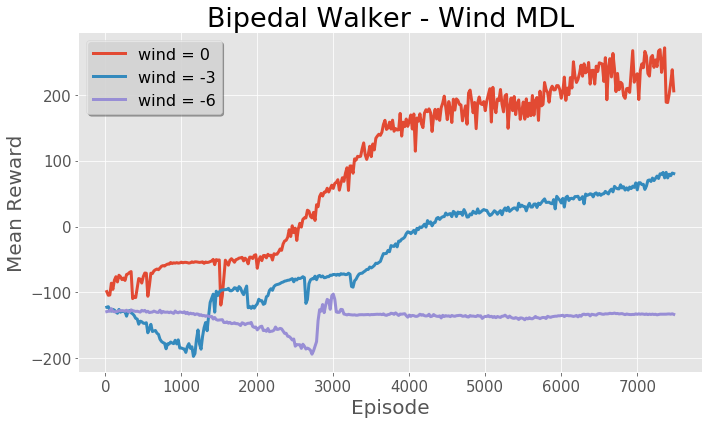

In [4]:
# Get CSV Data
path1 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_02:12:06/log_task_0.0.csv'
path2 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_02:12:06/log_task_3.0.csv'
path3 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_02:12:06/log_task_6.0.csv'
df_1 = pd.read_csv(path1, sep=',',header=0)
df_2 = pd.read_csv(path2, sep=',',header=0)
df_3 = pd.read_csv(path3, sep=',',header=0)
df_tot = [df_1, df_2, df_3] #df_4, df_5]

# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
batch_size = df_1['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size

# Configure plotting method
legend_names =["wind = 0", "wind = -3","wind = -6"]
exp_name = "Bipedal Walker - Wind MDL"
file_name = "PPO_MTL/plots/bipedal_wind_MDL_036.pdf"
save = True

# Plot Data
mean_R = np.zeros((num_exp, num_rows ))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


In [12]:
min_num_episodes

6180

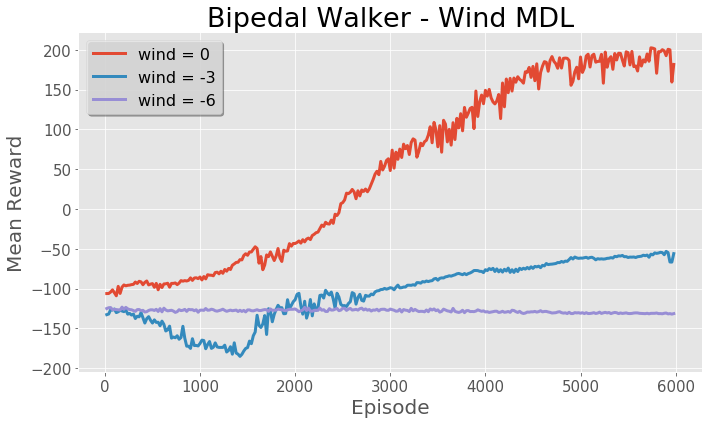

In [13]:
# Get CSV Data
path1 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_02:57:22/log_task_0.0.csv'
path2 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_02:57:22/log_task_3.0.csv'
path3 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_02:57:22/log_task_6.0.csv'
df_1 = pd.read_csv(path1, sep=',',header=0)
df_2 = pd.read_csv(path2, sep=',',header=0)
df_3 = pd.read_csv(path3, sep=',',header=0)
df_tot = [df_1, df_2, df_3] #df_4, df_5]

# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
batch_size = df_1['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size

# Configure plotting method
legend_names =["wind = 0", "wind = -3","wind = -6"]
exp_name = "Bipedal Walker - Wind MDL"
file_name = "PPO_MTL/plots/bipedal_wind_MDL_306.pdf"
save = True

# Plot Data
mean_R = np.zeros((num_exp, num_rows ))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


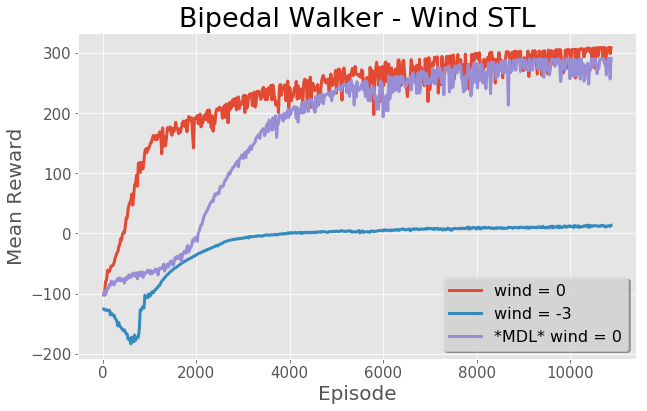

In [14]:

# Get CSV Data
path1 = 'PPO/log-files/BipedalWalker-v2/Jul-09_02:59:49/log.csv'
path2 = 'PPO/log-files/BipedalWalker-v2/Jul-09_02:56:15/log.csv'
path3 = 'PPO_MTL/log-files/BipedalWalker-v2/Jul-09_03:04:22/log_task_0.0.csv'

df_1 = pd.read_csv(path1, sep=',',header=0)
df_2 = pd.read_csv(path2, sep=',',header=0)
df_3 = pd.read_csv(path3, sep=',',header=0)
df_tot = [df_1, df_2, df_3]

# Get experiments properties
num_exp = len(df_tot)
num_episodes_tot = [df['_Episode'].as_matrix()[-1] for df in df_tot]
min_num_episodes = min(num_episodes_tot)
batch_size = df_1['_Episode'].as_matrix()[0]
num_rows = min_num_episodes // batch_size

# Configure plotting method
legend_names =["wind = 0", "wind = -3", "*MDL* wind = 0"]
exp_name = "Bipedal Walker - Wind STL"
file_name = "PPO/plots/bipedal_wind_STL_03.pdf"
save = False

# Plot Data
mean_R = np.zeros((num_exp, num_rows ))
for i,df in enumerate(df_tot):
    mean_R[i,:] = df['_MeanReward'].as_matrix()[0:num_rows]

plot_for_model(mean_R, min_num_episodes, batch_size, legend_names, exp_name, file_name=file_name, save=save)


### Other 

In [115]:
# Load CSV data
df_1 = pd.read_csv('fine00_2000.csv', sep=',',header=0)
df_2 = pd.read_csv('fine10_5000.csv', sep=',',header=0)
df_3 = pd.read_csv('fine86_10000.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3]
# df_tot = [df_2]

# Configure plotting method
legend_names =["2000 Iters","5000 Iters", "10000 Iters"]
# legend_names =["loss"]#,"5000 Iters", "10000 Iters"]
exp_name = "G and D losses for various Iterations"
# exp_name = "G vs D Warm up stage"
# file_name = "G_D_iters.pdf"
save = True

In [116]:
# Get experiments properties
num_exp = len(df_tot)
num_epochs_tot = [df.shape[0] for df in df_tot]
max_num_epochs = max(num_epochs_tot)
crop_iter = [2000, 5000, 10000]
# crop_iter = [150]

# Get Validation Accuracy for each experiment
g_loss = np.zeros((num_exp, max_num_epochs))
d_loss = np.zeros((num_exp, max_num_epochs))
for i,df in enumerate(df_tot):
    g_loss[i,0:crop_iter[i]] = df['generator_loss'].as_matrix()[0:crop_iter[i]]
    d_loss[i,0:crop_iter[i]] = df['discriminator_loss'].as_matrix()[0:crop_iter[i]] 
g_loss /= np.max(np.abs(g_loss))
d_loss /= np.max(np.abs(d_loss))
print(g_loss.shape)
print(d_loss.shape)

(3, 10516)
(3, 10516)


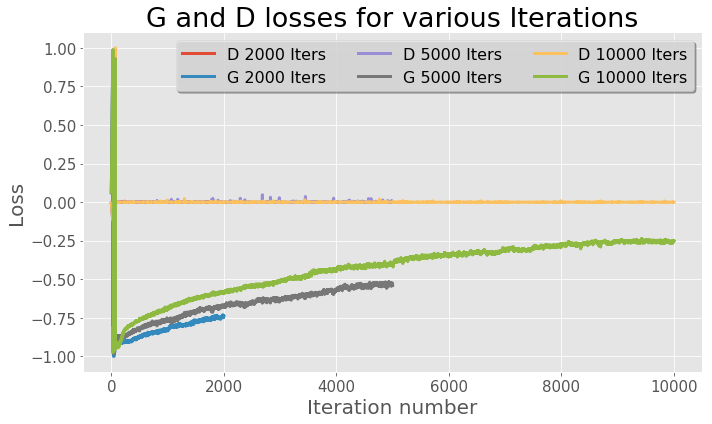

In [117]:
# Plot Data
plot_for_model(g_loss, d_loss, crop_iter, legend_names, exp_name, file_name=file_name, save=save)

In [ ]:
min_num_epochs = min(num_epochs_tot)

# Get Validation Accuracy for each experiment
acc_val = np.zeros((num_exp, min_num_epochs))
for i,df in enumerate(df_tot):
    acc_val[i,:] = df['val_c_accuracy_tot'].as_matrix()[0:min_num_epochs]    
    
# Plot Data
num_epochs = min_num_epochs
plot_for_model(acc_val, num_epochs, legend_names, exp_name, file_name=file_name, save=save)

#### Loss Func Experiments

In [32]:
# Load CSV data
os.chdir('/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/classification_logs/Loss exp.')
df_1 = pd.read_csv('3D_3S_classW_loss.csv', sep=',',header=0)
df_2 = pd.read_csv('3D_3S_accW_loss_2.csv', sep=',',header=0)
df_3 = pd.read_csv('3D_3S_FirstOne_loss.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3]

# Configure plotting method
legend_names =["Class Normed Loss","Acc. Weighted Loss", "One-task-first Loss"]
exp_name = "Multi-output Loss Func."
file_name = ["/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/saved_im/loss_val_acc.pdf" ]
save = True

####  Regularization Experiments

In [174]:
%autoreload
# Load CSV data
os.chdir('/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/classification_logs/Regularization exp.')
df_1 = pd.read_csv('L2_0.01_drop_0.csv', sep=',',header=0)
df_2 = pd.read_csv('L2_0.01_drop_1.csv', sep=',',header=0)
df_3 = pd.read_csv('L2_0.01_drop_2.csv', sep=',',header=0)
df_4 = pd.read_csv('L2_0.001_drop_0.csv', sep=',',header=0)
df_5 = pd.read_csv('L2_0.001_drop_1.csv', sep=',',header=0)
df_6 = pd.read_csv('L2_0.001_drop_2.csv', sep=',',header=0)
df_7 = pd.read_csv('L2_0.0001_drop_0.csv', sep=',',header=0)
df_8 = pd.read_csv('L2_0.0001_drop_1.csv', sep=',',header=0)
df_9 = pd.read_csv('L2_0.0001_drop_2.csv', sep=',',header=0)
df_10 = pd.read_csv('3D_3S_classW_loss.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

# Configure plotting method
legend_names =["L2=0.01, D=0","L2=0.01, D=1", "L2=0.01, D=2",\
               "L2=0.001, D=0","L2=0.001, D=1","L2=0.001, D=2",\
               "L2=0.0001, D=0", "L2=0.0001, D=1","L2=0.0001, D=2",\
               "L2=0.0, D=2"]
exp_name = "Regularization Methods"
file_name = ["/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/saved_im/regu_val_acc_FINAL.pdf" ]
save = True

#### Batch Norm. Experiments 

In [184]:
%autoreload
# Load CSV data
os.chdir('/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/classification_logs/BN exp.')

df_1 = pd.read_csv('BN_0.csv', sep=',',header=0)
df_2 = pd.read_csv('BN_1.csv', sep=',',header=0)
df_3 = pd.read_csv('BN_2.csv', sep=',',header=0)
df_tot = [df_1, df_2, df_3] 

# Configure plotting method
legend_names =["BN=0", "BN=1", "BN=2"]
exp_name = "Batch Normalization Methods"
file_name = ["/home/david/MEGA/MSc_Informatics/MSc_1/MLP/mlpractical/saved_im/BN_val_acc.pdf" ]
save = True

#### Run Plotting Code 

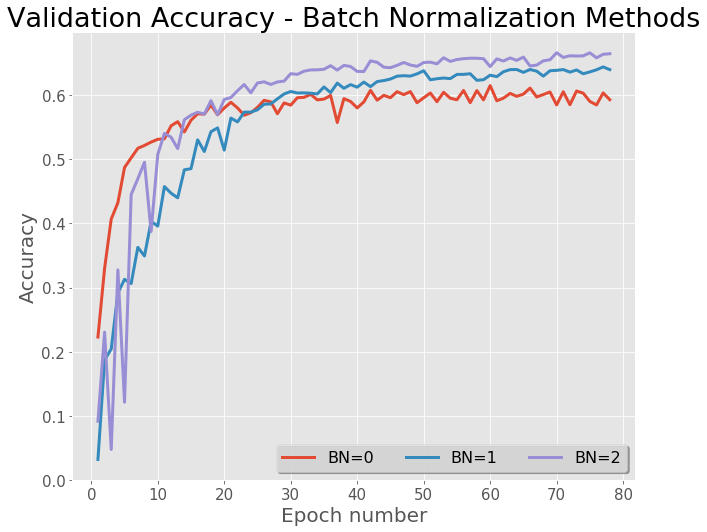

In [187]:
# Get experiments properties
num_exp = len(df_tot)
num_epochs_tot = [df.shape[0] for df in df_tot]
min_num_epochs = min(num_epochs_tot)

# Get Validation Accuracy for each experiment
acc_val = np.zeros((num_exp, min_num_epochs))
for i,df in enumerate(df_tot):
    acc_val[i,:] = df['val_c_accuracy_tot'].as_matrix()[0:min_num_epochs]    
    
# Plot Data
num_epochs = min_num_epochs
plot_for_model(acc_val, num_epochs, legend_names, exp_name, file_name=file_name, save=save)